https://www.hindawi.com/journals/jhe/2020/8857346/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from models.SIR_functions import get_SIR, fit_beta_and_gamma
from models.data_helpers import read_file, prep_data, POPULATION_OF_LA

# Test case

How well does the model do if we look at the case of the 1960s flu in NYC as modeled here: 
https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model

In [2]:
solver = get_SIR(0, 150, 1, 1.27e-6, 0, beta=0.5, gamma=1/3)

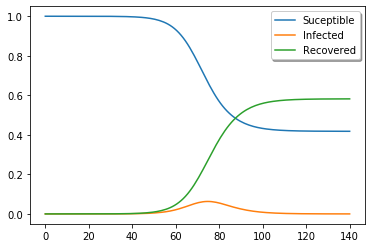

In [3]:
t = np.linspace(0,140,140)
result = solver.sol(t)
plt.plot(t, result.T)
plt.legend(['Suceptible', 'Infected', 'Recovered'], shadow=True)


# Okay, let's look at the simplest/most classical model, the SIR model

This is the list of the suceptible, infected, and recovered

In [4]:
df = read_file(filename='./data/LA_County_Covid19_cases_deaths_date_table.csv')

In [5]:
df.head()

,date_use,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths,suceptible,recovered,S,I,R
0,2020-03-01,311,25,NaN,0,0,NaN,10199689,NaN,0.999970,0.0,0.0
1,2020-03-02,330,19,NaN,0,0,NaN,10199670,NaN,0.999968,0.0,0.0
2,2020-03-03,343,13,NaN,0,0,NaN,10199657,NaN,0.999966,0.0,0.0
3,2020-03-04,362,19,NaN,0,0,NaN,10199638,NaN,0.999965,0.0,0.0
4,2020-03-05,396,34,NaN,0,0,NaN,10199604,NaN,0.999961,0.0,0.0


In [6]:
df.tail()

,date_use,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths,suceptible,recovered,S,I,R
657,2021-12-18,1487579,3266,2703.0,26054,9,9.0,8686367,1510930.0,0.851605,0.000265,0.148130
658,2021-12-19,1490345,2766,2944.0,26060,6,9.0,8683595,1513461.0,0.851333,0.000289,0.148379
659,2021-12-20,1496519,6174,3466.0,26065,5,8.0,8677416,1519118.0,0.850727,0.000340,0.148933
660,2021-12-21,1501267,4748,3810.0,26072,7,8.0,8672661,1523529.0,0.850261,0.000374,0.149366
661,2021-12-22,1501697,430,3437.0,26076,4,7.0,8672227,1524336.0,0.850218,0.000337,0.149445


# Let's model the initial surge in Los Angeles in May of 2020

In [7]:
df[80:180]

,date_use,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths,suceptible,recovered,S,I,R
80,2020-05-20,47692,1153,992.0,2059,30,41.0,10150249,48759.0,0.995122,0.000097,0.004780
81,2020-05-21,48639,947,950.0,2087,28,41.0,10149274,49776.0,0.995027,0.000093,0.004880
82,2020-05-22,49608,969,928.0,2130,43,41.0,10148262,50810.0,0.994928,0.000091,0.004981
83,2020-05-23,50355,747,926.0,2165,35,38.0,10147480,51594.0,0.994851,0.000091,0.005058
84,2020-05-24,50866,511,920.0,2204,39,38.0,10146930,52150.0,0.994797,0.000090,0.005113
...,...,...,...,...,...,...,...,...,...,...,...,...
175,2020-08-23,225365,631,1171.0,5519,30,35.0,9969116,229713.0,0.977364,0.000115,0.022521
176,2020-08-24,226970,1605,1185.0,5545,26,34.0,9967485,231330.0,0.977204,0.000116,0.022679
177,2020-08-25,228285,1315,1164.0,5575,30,34.0,9966140,232696.0,0.977073,0.000114,0.022813
178,2020-08-26,229604,1319,1173.0,5603,28,32.0,9964793,234034.0,0.976940,0.000115,0.022945


In [8]:
beta, gamma = fit_beta_and_gamma(df[80:180][['S', 'I', 'R']].values)

beta, gamma

(1.3037064548194601, 1.2813866284569326)

In [9]:
s0, i0, r0 = 0.995122, 0.000097, 0.004780

In [10]:
solver = get_SIR(0, 100, s0, i0, r0, beta=beta, gamma=gamma)

In [11]:
t = np.linspace(1, 100, 100)
z = solver.sol(t)

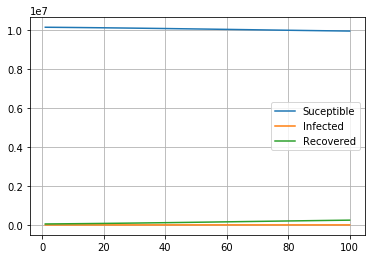

In [12]:
plt.plot(t, z.T * POPULATION_OF_LA)
plt.legend(['Suceptible', 'Infected', 'Recovered'])
plt.grid()


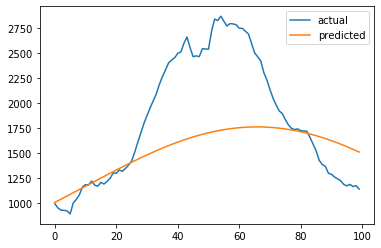

In [13]:
plt.plot(df[80:180]['avg_cases'].values, label='actual')
plt.plot(z.T[:,1] * POPULATION_OF_LA, label='predicted')
plt.legend()

# What about the peak in cases in late 2020/early 2021?

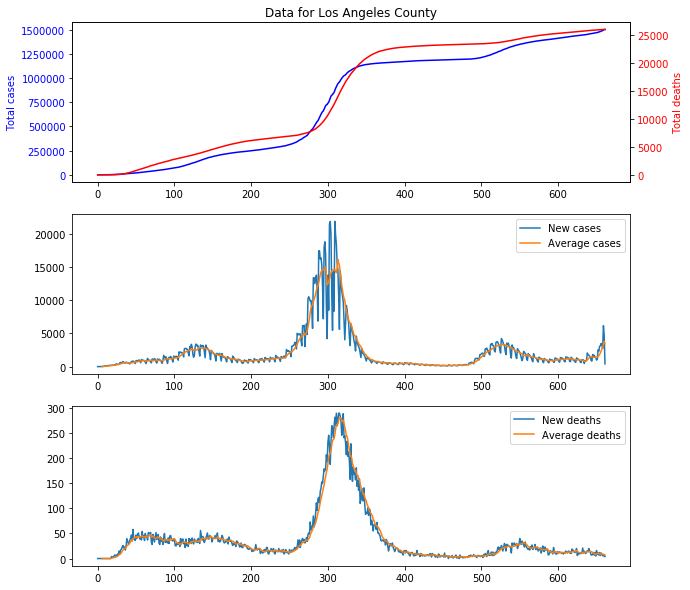

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

axs[0].plot( df['total_cases'], '-b', label='Total cases')
axs[0].set_ylabel('Total cases', color='b')
axs[0].tick_params(axis='y', labelcolor='b')
axs[0].set_title('Data for Los Angeles County')
ax_right = axs[0].twinx()
ax_right.plot( df['total_deaths'], '-r', label='Total deaths')
ax_right.set_ylabel('Total deaths', color='r')
ax_right.tick_params(axis='y', labelcolor='r')


axs[1].plot(df['new_case'], '-', label='New cases')
axs[1].plot(df['avg_cases'], '-', label='Average cases')
axs[1].legend()

axs[2].plot(df['new_deaths'], '-', label='New deaths')
axs[2].plot(df['avg_deaths'], '-', label='Average deaths')
axs[2].legend()

In [15]:
df[200:400]

,date_use,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths,suceptible,recovered,S,I,R
200,2020-09-17,248969,980,908.0,6158,19,20.0,9944873,254219.0,0.974988,0.000089,0.024923
201,2020-09-18,249876,907,902.0,6172,14,19.0,9943952,255146.0,0.974897,0.000088,0.025014
202,2020-09-19,250632,756,916.0,6188,16,18.0,9943180,255904.0,0.974822,0.000090,0.025089
203,2020-09-20,251237,605,924.0,6203,15,18.0,9942560,256516.0,0.974761,0.000091,0.025149
204,2020-09-21,252459,1222,941.0,6219,16,17.0,9941322,257737.0,0.974639,0.000092,0.025268
...,...,...,...,...,...,...,...,...,...,...,...,...
395,2021-03-31,1168772,515,472.0,22867,12,16.0,9008361,1191167.0,0.883173,0.000046,0.116781
396,2021-04-01,1169265,493,472.0,22879,12,15.0,9007856,1191672.0,0.883123,0.000046,0.116831
397,2021-04-02,1169798,533,484.0,22890,11,14.0,9007312,1192204.0,0.883070,0.000047,0.116883
398,2021-04-03,1170140,342,484.0,22897,7,12.0,9006963,1192553.0,0.883036,0.000047,0.116917


In [16]:
beta, gamma = fit_beta_and_gamma(df[200:400][['S', 'I', 'R']].values)

beta, gamma

(1.2580248393781528, 1.1803347796262853)

In [17]:
s0, i0, r0 = 0.974988, 0.000089, 0.024923

solver = get_SIR(0, 200, s0, i0, r0, beta=beta, gamma=gamma)

t = np.linspace(1, 200, 200)
z = solver.sol(t)

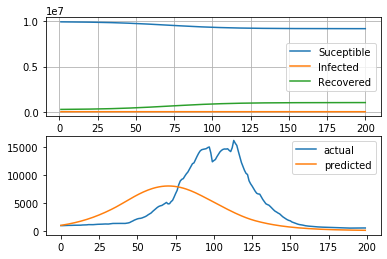

In [18]:
plt.subplot(211)
plt.plot(t, z.T * POPULATION_OF_LA)
plt.legend(['Suceptible', 'Infected', 'Recovered'])
plt.grid()

plt.subplot(212)

plt.plot(df[200:400]['avg_cases'].values, label='actual')
plt.plot(z.T[:,1] * POPULATION_OF_LA, label='predicted')
plt.legend()

In [20]:
df[-100:]

,date_use,total_cases,new_case,avg_cases,total_deaths,new_deaths,avg_deaths,suceptible,recovered,S,I,R
562,2021-09-14,1368218,1789,1707.0,24731,20,23.0,8807051,1391242.0,0.863436,0.000167,0.136396
563,2021-09-15,1369992,1774,1650.0,24748,17,22.0,8805260,1393090.0,0.863261,0.000162,0.136577
564,2021-09-16,1371459,1467,1573.0,24772,24,21.0,8803769,1394658.0,0.863115,0.000154,0.136731
565,2021-09-17,1372826,1367,1503.0,24794,22,20.0,8802380,1396117.0,0.862978,0.000147,0.136874
566,2021-09-18,1373799,973,1471.0,24821,27,21.0,8801380,1397149.0,0.862880,0.000144,0.136975
...,...,...,...,...,...,...,...,...,...,...,...,...
657,2021-12-18,1487579,3266,2703.0,26054,9,9.0,8686367,1510930.0,0.851605,0.000265,0.148130
658,2021-12-19,1490345,2766,2944.0,26060,6,9.0,8683595,1513461.0,0.851333,0.000289,0.148379
659,2021-12-20,1496519,6174,3466.0,26065,5,8.0,8677416,1519118.0,0.850727,0.000340,0.148933
660,2021-12-21,1501267,4748,3810.0,26072,7,8.0,8672661,1523529.0,0.850261,0.000374,0.149366


In [21]:
beta, gamma = fit_beta_and_gamma(df[-100:][['S', 'I', 'R']].values)

beta, gamma

(0.6491570565735525, 0.553615908074235)

In [23]:
s0, i0, r0 = 0.850218, 0.000337, 0.149445

solver = get_SIR(0, 100, s0, i0, r0, beta=beta, gamma=gamma)

t = np.linspace(1, 200, 100)
z = solver.sol(t)

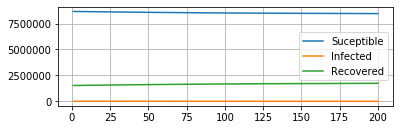

In [24]:
plt.subplot(211)
plt.plot(t, z.T * POPULATION_OF_LA)
plt.legend(['Suceptible', 'Infected', 'Recovered'])
plt.grid()

plt.subplot(212)

plt.plot(df[200:400]['avg_cases'].values, label='actual')
plt.plot(z.T[:,1] * POPULATION_OF_LA, label='predicted')
plt.legend()

In [27]:
z.T[:,1]* POPULATION_OF_LA

array([3431.38560359, 3418.08243059, 3403.1803816 , 3386.70202487,
       3368.68064785, 3349.15548376, 3328.16691864, 3305.75649135,
       3281.96689352, 3256.84196966, 3230.42671704, 3202.76728576,
       3173.91097875, 3143.90625174, 3112.80271326, 3080.65112468,
       3047.50340017, 3013.41260672, 2978.43296413, 2942.619845  ,
       2906.02977477, 2868.72043168, 2830.75064678, 2792.17955685,
       2753.05466408, 2713.4278993 , 2673.35334325, 2632.88371519,
       2592.0703729 , 2550.96331271, 2509.61116944, 2468.06121647,
       2426.35936567, 2384.55016746, 2342.67681079, 2300.78112312,
       2258.90357044, 2217.08325726, 2175.35792663, 2133.76396012,
       2092.33637782, 2051.10883834, 2010.11363883, 1969.38171497,
       1928.94264094, 1888.82462947, 1849.0545318 , 1809.6578377 ,
       1770.65867548, 1732.07981195, 1693.94265246, 1656.26724089,
       1619.07225963, 1582.37502962, 1546.19151029, 1510.53629963,
       1475.42263414, 1440.86238884, 1406.86607729, 1373.44285